<a href="https://colab.research.google.com/github/felixzhao/AIML425-ASSN-3/blob/main/notebooks/Q2_1_AIML425_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 6.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.3.1-py3-none-any.whl size=910454 sha256=64872aafc1bceeff4180ecb3fa03c10d3e8ff0702159d1a42934041ef843e0f3
  Stored in directory: /root/.cache/pip/wheels/ac/dc/30/e2874821ff308ee67dcd7a66dbde912411e19e35a1addda028
Successfully built torch-geometric


In [2]:
# !pip install --upgrade networkx

In [21]:
import torch
import random
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.data import Data
from scipy.sparse import csr_matrix

# Grid dimensions
n = 32  # 32x32 grid
N = n * n  # Total number of sensors

# Failure rate
F = 0.1  # For example, 10% failure rate

# Generate grid with failures
grid = torch.ones(n, n)
for i in range(n):
    for j in range(n):
        if random.random() < F:
            grid[i, j] = 0  # Sensor failed

# Initialize the tiger's track
edge = random.choice(["top", "bottom", "left", "right"])
if edge == "top":
    x, y = 0, random.randint(0, n-1)
elif edge == "bottom":
    x, y = n-1, random.randint(0, n-1)
elif edge == "left":
    x, y = random.randint(0, n-1), 0
else:  # edge == "right"
    x, y = random.randint(0, n-1), n-1

# Track of the tiger
track = [(x, y)]

# Simulate the tiger's movement
while True:
    dx, dy = random.choice([(-1, -1), (-1, 0), (-1, 1),
                            (0, -1),           (0, 1),
                            (1, -1),  (1, 0),  (1, 1)])
    x, y = x + dx, y + dy

    # Check for exit conditions
    if x < 0 or x >= n or y < 0 or y >= n:
        break  # Tiger has left the grid

    # If within grid, update the track
    track.append((x, y))

# Create adjacency matrix
adj_matrix = torch.zeros(N, N)
for i in range(n):
    for j in range(n):
        if grid[i, j] == 0:  # Skip failed sensors
            continue
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue  # Skip self-loop
                x, y = i + dx, j + dy
                if 0 <= x < n and 0 <= y < n and grid[x, y] == 1:
                    index1 = i * n + j
                    index2 = x * n + y
                    adj_matrix[index1, index2] = 1

# Convert to PyTorch Geometric Data
edge_index = adj_matrix.nonzero().t().contiguous()
data = Data(edge_index=edge_index)

In [22]:
track

[(19, 31),
 (20, 31),
 (19, 30),
 (18, 29),
 (17, 28),
 (18, 28),
 (19, 29),
 (20, 30),
 (19, 30),
 (18, 30),
 (19, 30),
 (20, 30),
 (21, 31),
 (20, 31),
 (19, 30),
 (19, 31),
 (19, 30),
 (20, 29),
 (21, 29),
 (22, 28),
 (21, 27),
 (21, 26),
 (22, 25),
 (22, 24),
 (21, 24),
 (20, 25),
 (21, 26),
 (22, 26),
 (23, 27),
 (24, 26),
 (23, 27),
 (22, 26),
 (23, 25),
 (22, 24),
 (21, 24),
 (21, 23),
 (20, 22),
 (20, 21),
 (21, 22),
 (22, 22),
 (23, 22),
 (24, 23),
 (25, 23),
 (26, 23),
 (25, 22),
 (25, 21),
 (24, 20),
 (23, 21),
 (24, 21),
 (23, 21),
 (24, 22),
 (25, 22),
 (25, 21),
 (26, 22),
 (25, 21),
 (26, 20),
 (25, 21),
 (24, 22),
 (24, 23),
 (24, 24),
 (23, 23),
 (24, 22),
 (25, 23),
 (26, 23),
 (27, 23),
 (27, 24),
 (28, 25),
 (27, 26),
 (28, 25),
 (29, 25),
 (29, 24),
 (28, 24),
 (29, 24),
 (28, 24),
 (27, 24),
 (27, 23),
 (26, 23),
 (25, 24),
 (25, 23),
 (25, 24),
 (24, 25),
 (23, 24),
 (22, 25),
 (23, 24),
 (23, 23),
 (22, 23),
 (23, 22),
 (23, 21),
 (24, 20),
 (25, 21),
 (24, 22),

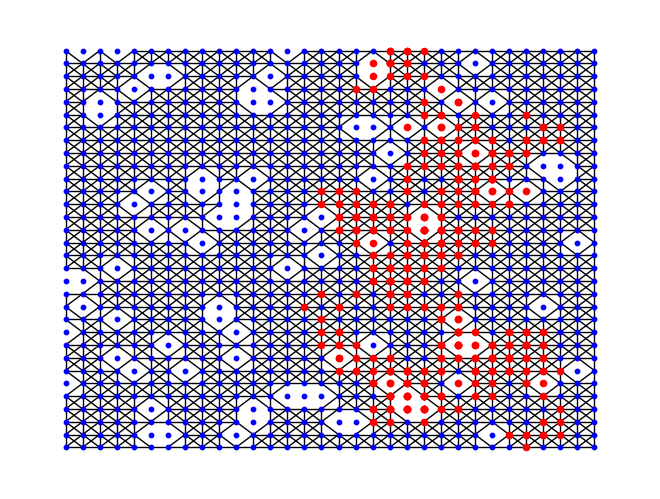

In [23]:
# Convert to SciPy sparse matrix
adj_matrix_numpy = adj_matrix.numpy()
adj_matrix_sparse = csr_matrix(adj_matrix_numpy)

# To visualize the graph, we convert it to a networkx graph and plot
G = nx.from_scipy_sparse_array(adj_matrix_sparse)
pos = {i: [(i // n) % n, i % n] for i in range(N)}
nx.draw(G, pos, node_size=10, node_color='blue')

# Highlight the tiger's track in a different color
track_indices = [x * n + y for x, y in track]
nx.draw_networkx_nodes(G, pos, nodelist=track_indices, node_color='red', node_size=20)

plt.show()